In [3]:
!pip install statsmodels librosa matplotlib pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.6 MB 2.4 MB/s eta 0:00:04
   ------ --------------------------------- 1.6/9.6 MB 4.4 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.6 MB 4.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/9.6 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.6 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.6 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.6 MB 2.9 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.6 MB 2.9 MB/s eta 0:00:03
   --------------- ------------------------ 3.7/9.6 MB 1.9 MB/s eta 0:00:04
   ---------------- ----------------------- 3.9/9.6 MB 1.8 MB/s eta 0:00:04
   ----------------- ---


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


file_path = 'AirPassengers.csv'
df = pd.read_csv(file_path)


print(df.head())




     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


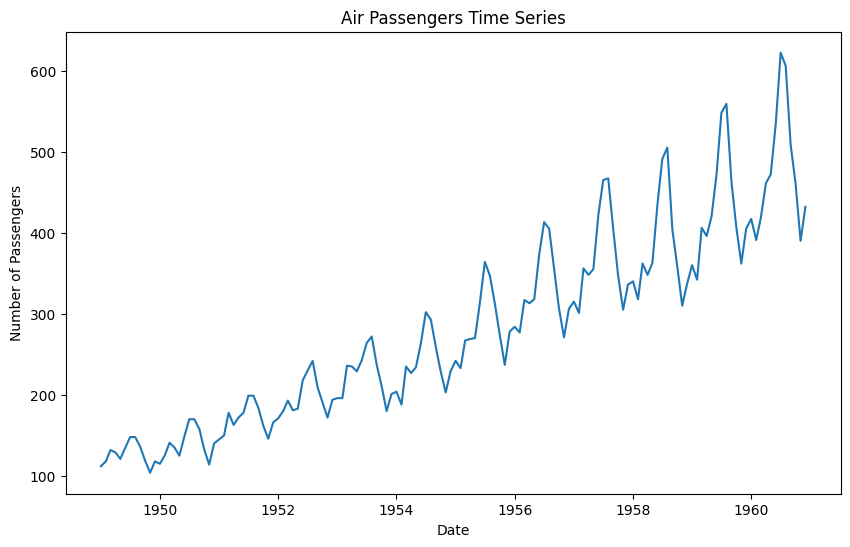

In [6]:
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')
df.set_index('Month', inplace=True)

# 4. Visualiser la série
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'])
plt.title('Air Passengers Time Series')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.show()



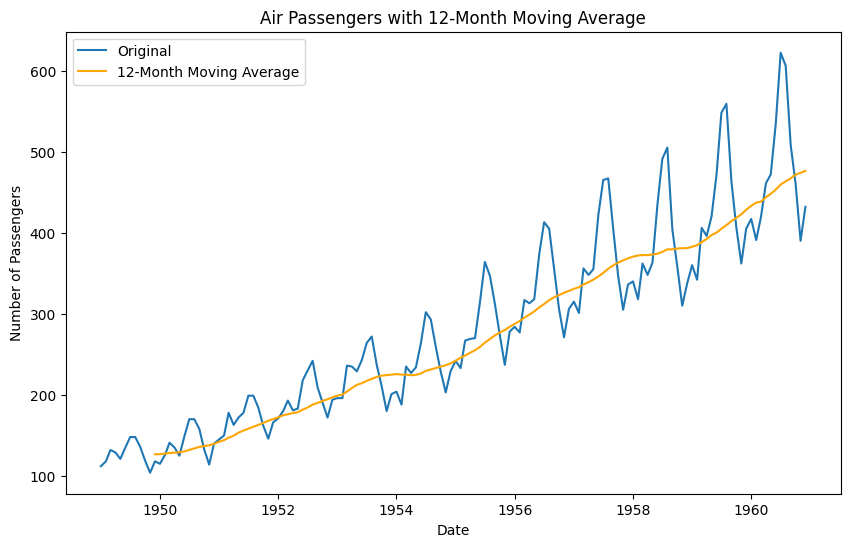

In [7]:
df['Moving_Avg_12'] = df['Passengers'].rolling(window=12).mean()

plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Passengers'], label='Original')
plt.plot(df.index, df['Moving_Avg_12'], label='12-Month Moving Average', color='orange')
plt.title('Air Passengers with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.show()




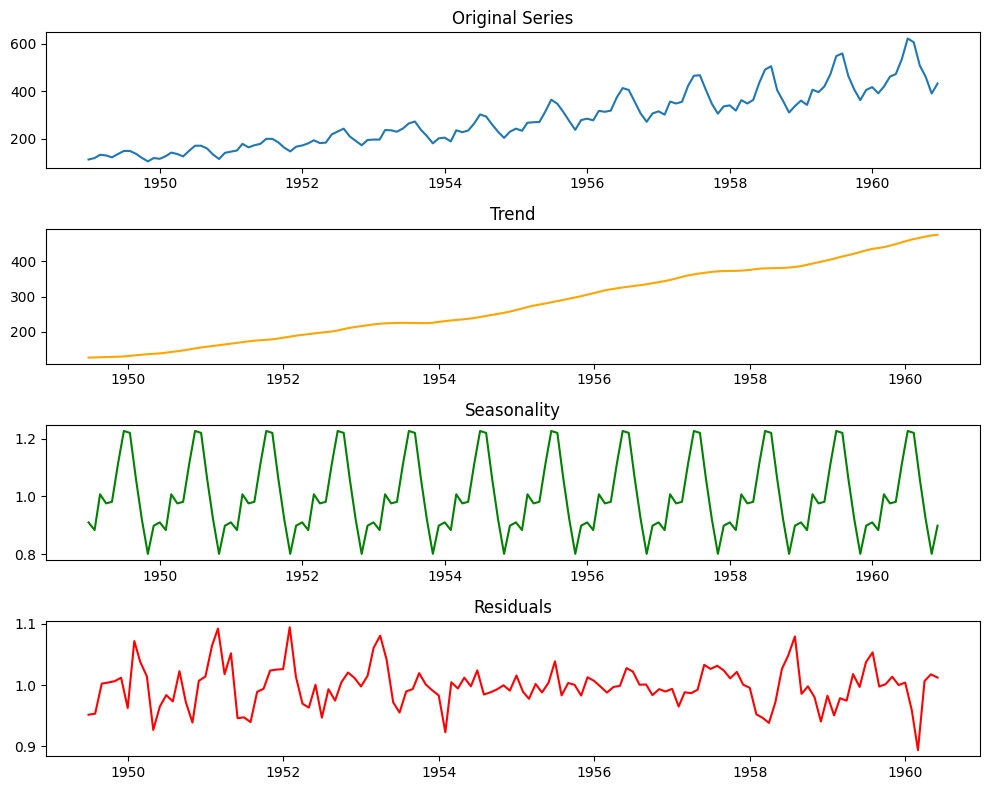

In [8]:
decomposition = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(df.index, df['Passengers'], label='Original')
plt.title('Original Series')
plt.subplot(412)
plt.plot(df.index, decomposition.trend, label='Trend', color='orange')
plt.title('Trend')
plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, label='Seasonality', color='green')
plt.title('Seasonality')
plt.subplot(414)
plt.plot(df.index, decomposition.resid, label='Residuals', color='red')
plt.title('Residuals')
plt.tight_layout()
plt.show()